In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


1.TOP BATESMAN BY RUNS

Task:Task: Find the top 10 batsman based on the total number of runs score.

In [9]:
top_batsmen = df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

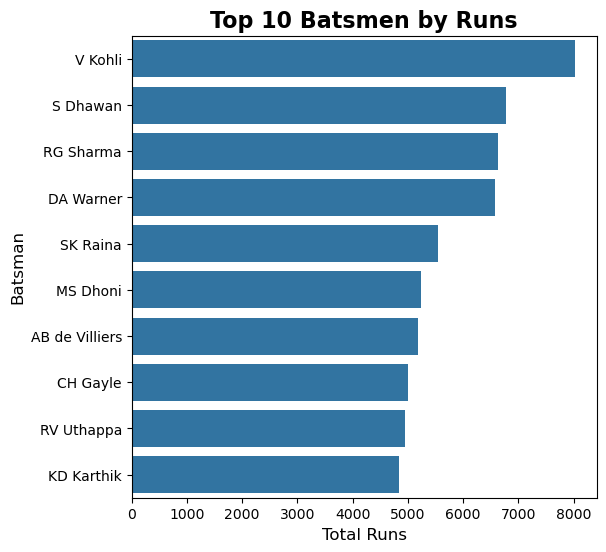

In [75]:
plt.figure(figsize=(6,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index)
plt.title('Top 10 Batsmen by Runs', fontsize=16, weight='bold')
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Batsman', fontsize=12)
plt.show()

2. TOP BOWLERS BY WICKETS

Task: Identify the bowlers who have taken most wickets

In [15]:
top_bowlers = df[df['is_wicket'] == 1].groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)

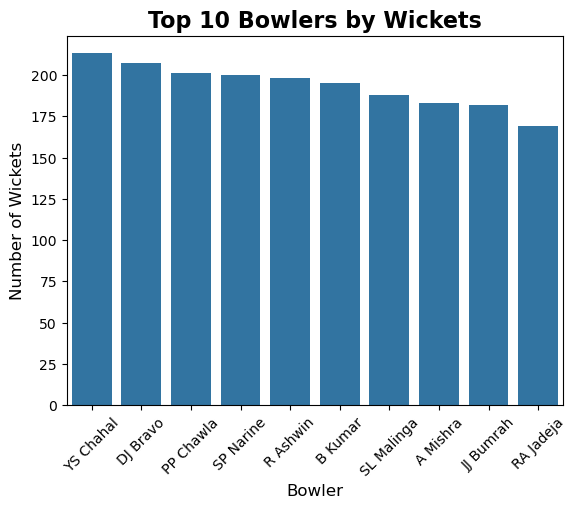

In [31]:
sns.barplot(x=top_bowlers.index, y=top_bowlers.values)
plt.title('Top 10 Bowlers by Wickets', fontsize=16, weight='bold')
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Number of Wickets', fontsize=12)
plt.xticks(rotation=45)
plt.show()

3.RUN DISTRIBUTION BY OVER

 Task:Analyze how runs are distributed across different overs in a match. 

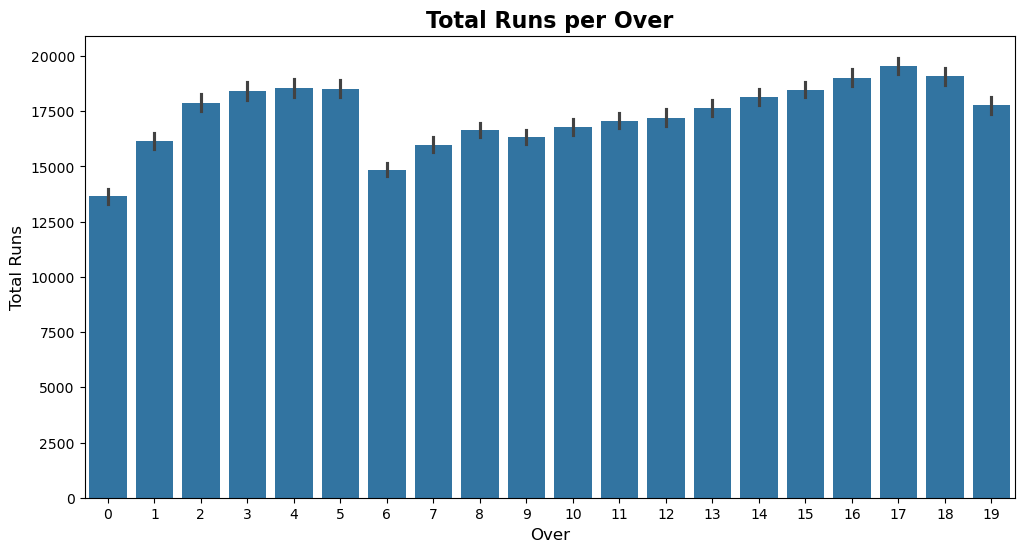

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='over', y='total_runs', data=df, estimator=sum)
plt.title('Total Runs per Over', fontsize=16, weight='bold')
plt.xlabel('Over', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.show()

4.EXTRAS BREAKDOWN 

Task: Investigate the distribution of extras (wides, no balls, byes, etc.).

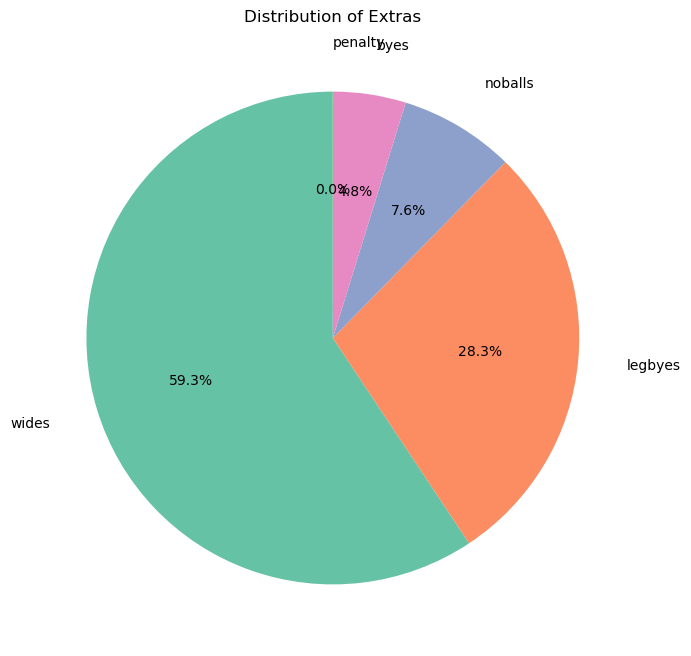

In [67]:
extras = df['extras_type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(extras, labels=extras.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'),labeldistance=1.2)
plt.title('Distribution of Extras')
plt.show()

5.DISMISSALS TYPES 

Task: Analyze the types of dismissals (e.g., bowled, caught, LBW). 

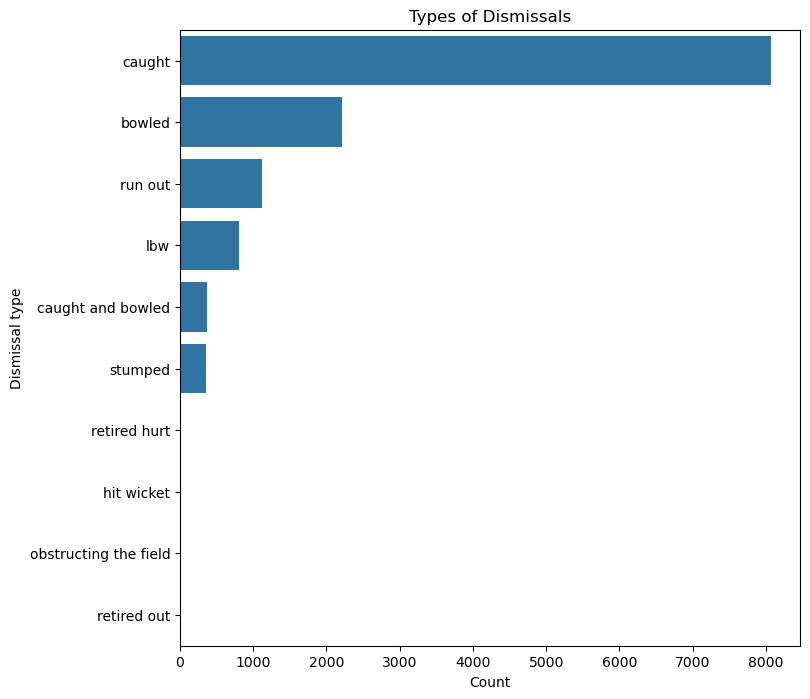

In [93]:
dismissal_types = df['dismissal_kind'].value_counts()
plt.figure(figsize=(8,8))
sns.barplot(x=dismissal_types.values, y=dismissal_types.index)
plt.title('Types of Dismissals')
plt.xlabel('Count')
plt.ylabel('Dismissal type')
plt.show()

6.TEAM PERFORMANCE cOMPARISION 

Task: Compare the total runs scored by each team. This will show which teams have been the most successful in scoring runs, helping to compare team performances over time. 

In [33]:
team_performance = df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

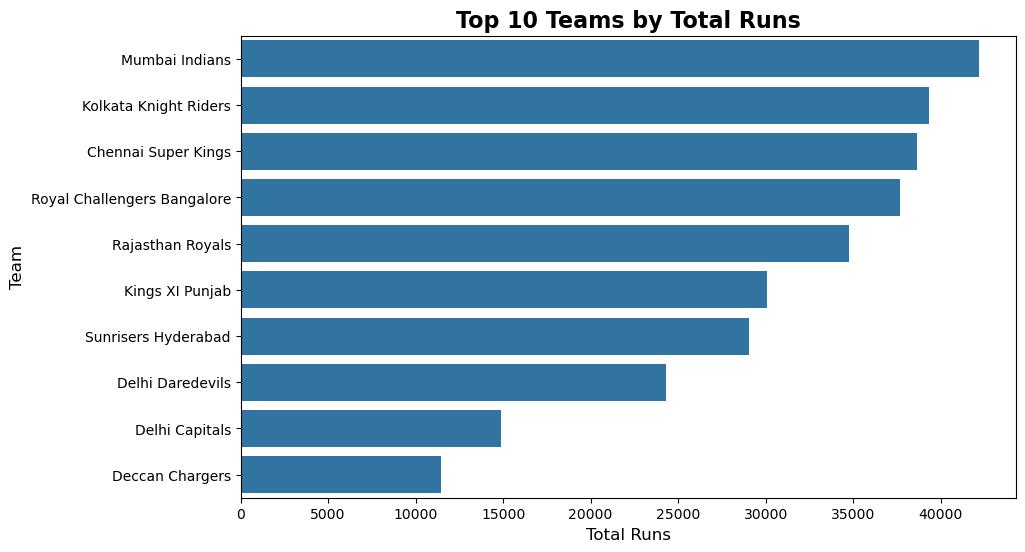

In [37]:
top_teams = team_performance.head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_teams.values, y=top_teams.index)

# Customizing the plot
plt.title('Top 10 Teams by Total Runs', fontsize=16, weight='bold')
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Team', fontsize=12)

# Displaying the plot
plt.show()